In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [3]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/elice_hana_DT/track_2_실전 데이터 분석'

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

In [4]:
%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive/Colab Notebooks/elice_hana_DT/track_2_실전 데이터 분석
'Chapter 1. 트럼프 대통령 트윗으로 시작하는 데이터 처리.ipynb'
'Chapter 2 영어 단어 모음으로 시작하는 텍스트 파일 분석.ipynb'
'Chapter 3 넷플릭스 시청 데이터로 알아보는 데이터형 변환.ipynb'
'Chapter 4 테드 강연으로 다뤄보는 복잡한 형태의 데이터'
 data/
 lectures/


## 데이터 빠르게 탐색하기
딕셔너리(dictionary)는 키와 값이 키:값 형태로 이루어진 데이터 구조입니다.
키와 값이 쌍을 이루기 때문에 키를 이용해 값을 빠르게 찾아낼 수 있습니다.

In [5]:
# 텍스트 파일을 불러옵니다.
source_file = "data/netflix.txt"

def make_dictionary(filename):
    user_to_titles = {}
    with open(filename) as file:
        for line in file:
            # 아래 코드를 작성하세요.
            user, title = line.strip().split(":")
            user_to_titles[user] = title
            
        return user_to_titles


# 아래 주석을 해제하고 결과를 확인해보세요.  
print(make_dictionary(source_file))


{'1': '1012', '2': '3781', '3': '1732', '4': '889', '5': '2345', '6': '107', '7': '379'}


## 데이터 순회하기
for문과 items() 메소드를 이용하면 딕셔너리의 모든 키와 값을 (키, 값)의 형태로 리스트에 담을 수 있습니다.

In [ ]:
# 사용자가 시청한 작품의 리스트를 저장합니다. 수정하지 마세요. 
user_to_titles = {
    1: [271, 318, 491],
    2: [318, 19, 2980, 475],
    3: [475],
    4: [271, 318, 491, 2980, 19, 318, 475],
    5: [882, 91, 2980, 557, 35],
}
def get_user_to_num_titles(user_to_titles):
    user_to_num_titles = {}
    
    # 아래 함수를 완성하세요.
    for user, titles in user_to_titles.items():
      user_to_num_titles[user] = len(titles)
    
    return user_to_num_titles
    

# 아래 주석을 해제하고 결과를 확인해보세요.  
print(get_user_to_num_titles(user_to_titles))


{1: 3, 2: 4, 3: 1, 4: 7, 5: 5}


## JSON 데이터 읽고 생성하기
JSON(JavaScript Object Notation)과 파이썬의 딕셔너리는 모두 키:값이 쌍으로 이루어진 데이터 형식입니다. 파이썬의 json 패키지에 포함된 함수를 이용해 두 형식을 쉽게 변환할 수 있습니다.

loads(): JSON 형태의 문자열을 딕셔너리로 변환합니다. 이 때 딕셔너리의 모든 원소는 문자열 타입으로 설정됩니다.
dumps(): 딕셔너리를 JSON 형태의 문자열로 변환합니다.

In [ ]:
# json 패키지를 임포트합니다.
import json

# 형변환
# number = "1"
# int(number)

#JSON 파일을 읽고 문자열을 딕셔너리로 변환합니다.
def create_dict(filename):
    with open(filename) as file:
        json_string = file.read()
        
        # 함수를 완성하세요.
        return json.loads(json_string)


#JSON 파일을 읽고 딕셔너리를 JSON 형태의 문자열로 변환합니다.
# w 읽기
def create_json(dictionary, filename):
    with open(filename, 'w') as file:
        # 함수를 완성하세요.
        json_string = json.dumps(dictionary)
        file.write(json_string)
                
# 아래 주석을 해제하고 결과를 확인해보세요.  
src = 'data/netflix.json'
dst = 'data/new_netflix.json'

netflix_dict = create_dict(src)
print('원래 데이터: ' + str(netflix_dict))

netflix_dict['Dark Knight'] = 39217
create_json(netflix_dict, dst)
updated_dict = create_dict(dst)
print('수정된 데이터: ' + str(updated_dict))

원래 데이터: {'Iron Man': 31928, 'Iron Man 2': 15293, 'Dark Knight': 42107, 'Man in Black': 20113}
수정된 데이터: {'Iron Man': 31928, 'Iron Man 2': 15293, 'Dark Knight': 39217, 'Man in Black': 20113}


## 데이터의 집합 나타내기
파이썬의 set은 집합을 나타내는 데이터 구조입니다. 집합은 순서와 중복이 없는 데이터 구조로, 데이터 분석에서 중복을 무시해야 하는 경우에 사용할 수 있습니다.

예로, 수강생 명단이 주어졌을 때 set을 이용하면 학생 유형을 쉽게 구할 수 있습니다.

A 수업과 B 수업 둘 중 하나 이상을 수강하는 학생 수 구하기
A 수업과 B 수업을 모두 수강하는 학생 수 구하기

In [ ]:
# 정수 3과 5를 원소로 갖는 새로운 집합을 생성합니다.
my_set = {3, 5}

# 채점을 위한 코드입니다. 수정하지 마세요. 
submit1 = my_set.copy()
print(submit1)

# 정수 7을 my_set에 추가합니다.
my_set.add(7)

# 채점을 위한 코드입니다. 수정하지 마세요. 
submit2 = my_set.copy()
print(submit2)

# new_numbers 리스트의 원소를 my_set에 추가합니다.
new_numbers = [1, 2, 3, 4, 5]
my_set.update(new_numbers)

# 채점을 위한 코드입니다. 수정하지 마세요. 
submit3 = my_set.copy()
print(submit3)

# my_set에서 짝수를 모두 제거합니다.
my_set = {num for num in my_set if num % 2 != 0}

# 채점을 위한 코드입니다. 수정하지 마세요. 
submit4 = my_set.copy()
print(submit4)


{3, 5}
{3, 5, 7}
{1, 2, 3, 4, 5, 7}
{1, 3, 5, 7}


## 집합 연산자
집합 연산자를 이용하면, 합집합, 교집합, 차집합 등의 집합 연산을 수행할 수 있습니다.

합집합: 두 집합 중 최소 하나에 속하는 원소들의 집합
교집합: 두 집합에 모두 속하는 원소들의 집합
B에 대한 A의 차집합: A에는 속하지만 B에는 속하지 않는 원소들의 집합

In [ ]:
dark_knight = [341, 773, 867, 741, 372, 336, 774, 458, 642, 8, 858, 586, 382, 106, 375, 634, 206, 11, 984, 531, 544, 953, 737, 727, 791, 306, 398, 300, 818, 454, 919, 362, 25, 553, 514, 792, 497, 926, 773, 989, 531, 512, 301, 720, 123, 135, 672, 526, 795, 697, 255, 759, 338, 966, 315, 500, 445, 945, 392, 158, 620, 322, 859, 160, 363, 742, 239, 983, 638, 486, 499, 2, 27, 139, 359, 50, 423, 460, 396, 49, 596, 931, 812, 753, 206, 366, 432, 92, 274, 941, 418, 279, 868, 903, 310, 955, 952, 203, 315, 208, 380, 880, 23, 459, 782, 575, 51, 322, 901, 378, 45, 958, 256, 165, 473, 435, 504, 972, 817, 543, 584, 82, 224, 476, 452, 801, 786, 763, 516, 363, 312, 628, 746, 920, 924, 262, 800, 71, 978, 482, 60, 474, 892, 85, 97, 331, 787, 430, 100, 92, 436, 813, 966, 389, 838, 412, 514, 766, 321, 17, 319, 635, 498, 13, 118, 550, 306, 173, 15, 384, 939, 819, 685, 506, 984, 37, 327, 421, 452, 237, 920, 135, 339, 197, 579, 158, 655, 734, 172, 167, 563, 979, 740, 351, 493, 140, 819, 911, 180, 11, 514, 557, 552, 149, 823, 499, 127, 740, 937, 637, 562, 569, 597, 546, 707, 684, 439, 908, 340, 660, 496, 257, 165, 34, 863, 754, 751, 713, 442, 316, 237, 90, 993, 600, 884, 434, 915, 863, 508, 839, 933, 170, 304, 576, 696, 234, 945, 6, 468, 45, 405, 595, 547, 278, 885, 285, 908, 172, 679, 780, 89, 45, 247, 473, 270, 453, 519, 782, 614, 603, 755, 755, 265, 992, 243, 51, 650, 696, 403, 790, 877, 157, 892, 67, 488, 600, 146, 923, 578, 509, 943, 430, 69, 661, 45, 1, 906, 773, 138, 742, 517, 26, 479, 567, 620, 806, 724, 250, 961, 344, 138, 18, 415, 896, 647, 712, 231, 584, 962, 130, 50, 481, 694, 294, 960, 883, 257, 780, 745, 25, 243, 584, 463, 801, 739, 30, 727, 827, 555, 294, 208, 275, 418, 597, 759, 284, 902, 543, 234, 448, 511, 954, 722, 485, 665, 581, 727, 511, 658, 491, 379, 609, 936, 111, 454, 637, 746, 915, 147, 409, 330, 354, 189, 498, 968, 538, 831, 131, 144, 661, 153, 661, 107, 448, 555, 329, 503, 128, 606, 681, 711, 602, 791, 39, 529, 738, 302, 121, 307, 994, 697, 909, 566, 577, 477, 874, 398, 815, 276, 758, 923, 620, 797, 829, 62, 907, 188, 15, 231, 836, 82, 557, 206, 14, 166, 365, 53, 412, 38, 62, 168, 764, 67, 953, 839, 837, 248, 121, 882, 292, 744, 110, 315, 588, 892, 218, 393, 35, 438, 612, 796, 861, 787, 817, 464, 264, 702, 782, 522, 3, 749, 74, 753, 945, 402, 708, 264, 671, 388, 325, 692, 61, 188, 724, 405, 758, 435, 386, 557, 785, 806, 348, 93, 14, 624, 825, 90, 894, 829, 24, 954, 373, 406, 522, 950, 818, 770, 954, 241, 47, 972, 990, 398, 788, 67, 78, 657, 938, 583, 308, 966, 723, 630, 713, 426, 466, 259, 738, 607, 896, 136, 81, 807, 86, 210, 662, 910, 971, 444, 170, 878, 198, 674, 195, 795, 962, 546, 505, 902, 718, 149, 543, 868, 7, 443, 579, 786, 87, 109, 982, 639, 570, 405, 919, 112, 808, 624, 643, 706, 172, 258, 333, 300, 154, 468, 388, 763, 68, 579, 876, 789, 675, 454, 426, 976, 503, 325, 826, 821, 568, 738, 533, 583, 904, 445, 302, 901, 508, 429, 670, 632, 662, 720, 554, 771, 296, 914, 557, 648, 355]
iron_man = [869, 942, 510, 325, 254, 871, 753, 734, 223, 277, 617, 5, 300, 767, 198, 101, 87, 997, 879, 824, 943, 940, 661, 135, 622, 633, 426, 332, 165, 27, 434, 163, 969, 423, 919, 203, 863, 71, 847, 773, 863, 622, 881, 460, 399, 700, 137, 72, 429, 456, 73, 943, 525, 324, 253, 223, 355, 428, 183, 612, 801, 604, 723, 111, 752, 425, 896, 392, 602, 781, 475, 792, 258, 565, 928, 901, 267, 752, 69, 559, 597, 910, 54, 807, 492, 249, 944, 523, 209, 506, 290, 405, 678, 579, 115, 553, 918, 620, 102, 441, 733, 443, 160, 144, 932, 795, 976, 311, 166, 881, 58, 361, 904, 863, 401, 750, 612, 985, 264, 101, 584, 899, 250, 904, 478, 546, 388, 170, 260, 836, 651, 921, 277, 17, 891, 783, 900, 235, 32, 179, 766, 110, 961, 834, 645, 40, 96, 421, 953, 470, 153, 785, 570, 862, 813, 835, 108, 650, 994, 378, 678, 327, 744, 195, 349, 453, 156, 835, 689, 872, 745, 766, 371, 753, 999, 960, 768, 923, 446, 410, 162, 789, 144, 973, 670, 229, 815, 856, 807, 811, 107, 838, 879, 451, 475, 546, 828, 833, 759, 763, 342, 801, 177, 358, 186, 705, 710, 7, 304, 521, 239, 571, 383, 352, 367, 929, 831, 866, 148, 965, 167, 534, 949, 340, 695, 812, 501, 464, 612, 400, 467, 305, 112, 59, 497, 208, 667, 803, 633, 439, 301, 875, 666, 653, 970, 354, 640, 36, 74, 212, 958, 333, 289, 936, 893, 462, 687, 2, 720, 356, 441, 516, 69, 181, 231, 251, 271, 611, 98, 824, 524, 123, 980, 732, 531, 605, 209, 462, 127, 902, 925, 230, 455, 382, 925, 87, 280, 512, 82, 813, 156, 859, 548, 385, 574, 480, 668, 20, 545, 11, 783, 351, 937, 248, 960, 500, 593, 429, 934, 128, 400, 387, 44, 115, 27, 571, 524, 306, 819, 592, 892, 457, 369, 214, 390, 729, 103, 107, 185, 978, 875, 591, 5, 850, 606, 863, 692, 495, 340, 501, 645, 117, 571, 788, 75, 880, 804, 155, 661, 344, 872, 846, 989, 90, 59, 904, 654, 161, 902, 31, 580, 681, 625, 937, 3, 848, 460, 834, 917, 334, 85, 391, 813, 907, 996, 150, 667, 849, 814, 279, 492, 319, 152, 740, 397, 501, 679, 519, 874, 559, 517, 729, 429, 789, 964, 758, 87, 355, 484, 697, 225, 654, 223, 682, 875, 599, 223, 9, 68, 520, 817, 702, 580, 977, 851, 605, 96, 522, 524, 427, 735, 858, 189, 340, 339, 612, 61, 902, 219, 183, 865, 78, 881, 408, 275, 905, 776, 512, 349, 881, 483, 203, 408, 930, 903, 132, 829, 527, 915, 372, 895, 863, 797, 669, 176, 497, 317, 395, 158, 555, 64, 624, 288, 761, 990, 40, 170, 271, 215, 156, 409, 79, 20, 65, 489, 843, 591, 618, 381, 290, 83, 470, 859, 870, 753, 853, 984, 39, 588, 103, 897, 565, 583, 133, 224, 76, 182, 367, 224, 169, 597, 775, 581, 894, 971, 822, 661, 994, 0, 39, 431, 829, 841, 723, 237, 518, 579, 103, 983, 819, 701, 682, 905, 296, 577, 851, 798, 85, 242, 329, 198, 421, 51, 214, 153, 266, 212, 424, 930, 660, 62, 254, 555, 419, 440, 871, 972, 122, 98, 299, 638, 388, 830, 404, 479, 947, 966, 527, 234, 545, 220, 124, 434, 391, 936, 712, 995, 141, 829, 516, 558, 215, 141, 849, 971, 405, 244, 479, 693, 413, 647, 942, 568, 132, 221, 954, 592, 82, 158, 781, 990, 753, 423, 478, 626, 572, 527, 440, 344, 13]

In [ ]:
# 각 영화 별 시청자 리스트를 임포트합니다.
# from viewers import dark_knight, iron_man
dark_knight_set = set(dark_knight)
iron_man_set = set(iron_man)

# 두 작품을 모두 시청한 사람의 수
both = len(dark_knight_set & iron_man_set)

# 두 작품 중 최소 하나를 시청한 사람의 수
either = len(dark_knight_set | iron_man_set)

# 다크나이트만 시청한 사람의 수
dark_knight_only = len(dark_knight_set - iron_man_set)

# 아이언맨만 시청한 사람의 수
iron_man_only = len(iron_man_set - dark_knight_set)


# 아래 주석을 해제하고 실행 결과를 확인해보세요.
print("두 작품 모두 시청: {}명".format(both))
print("하나 이상 시청: {}명".format(either))
print("다크나이트만 시청: {}명".format(dark_knight_only))
print("아이언맨만 시청: {}명".format(iron_man_only))


두 작품 모두 시청: 188명
하나 이상 시청: 717명
다크나이트만 시청: 267명
아이언맨만 시청: 262명


## matplotlib으로 차트 설정하기
파이썬의 차트 라이브러리인 matploblib에 대해서 더 자세히 알아봅시다. matplotlib 라이브러리는 단순히 차트를 그리는 것뿐만 아니라, 차트에 더 많은 정보를 추가하고 보기 좋게 만드는 다양한 기능을 제공하고 있습니다.

한국어 표시를 위해 폰트 설정하기
차트의 제목 설정하기
X축과 Y축에 라벨 표시하기
차트의 여백 조정하기

In [ ]:
%config InlineBackend.figure_format = 'retina'
!sudo apt-get -qq -y install fonts-nanum

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


NameError: ignored

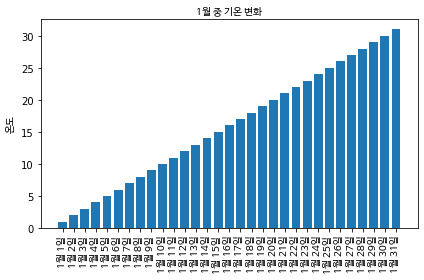

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# 날짜 별 온도 데이터를 세팅합니다.
dates = ["1월 {}일".format(day) for day in range(1, 32)]
temperatures = list(range(1, 32))

# 막대 그래프의 막대 위치를 결정하는 pos를 선언합니다.
pos = range(len(dates))

# 한국어를 보기 좋게 표시할 수 있도록 폰트를 설정합니다.
font = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 막대의 높이가 빈도의 값이 되도록 설정합니다.
plt.bar(pos, temperatures, align='center')

# 각 막대에 해당되는 단어를 입력합니다.
plt.xticks(pos, dates, rotation='vertical', fontproperties=font)

# 그래프의 제목을 설정합니다.
plt.title('1월 중 기온 변화', fontproperties=font)

# Y축에 설명을 추가합니다.
plt.ylabel('온도', fontproperties=font)

# 단어가 잘리지 않도록 여백을 조정합니다.
plt.tight_layout()

# 그래프를 표시합니다.
plt.savefig('graph.png')
# elice_utils.send_image('graph.png')
